# yolo 모델의 output인 json 파일에서 좌표 추출해서 bounding box croping
### 
### 오늘 시간이 얼마 없어서 더 유의미한 결과는 도출하지 못 했습니다.
### 추후 저희 yolo custom 모델의 output을 전달받으면 class를 확인해서 버스 번호 또는 차량 번호판으로 인식될 때만 OCR을 통해 output을 출력하는 모델을 구현하고 함수화 할 예정
### 그렇게 되면 버스 번호 인식 부분의 표면적인 기능구현은 끝날 것으로 예상

[
	{
		"label": "bus",
		"confidence": 0.89,
		"topleft": {
			"x": 175,
			"y": 197
		},
		"bottomright": {
			"x": 1126,
			"y": 656
		}
	}
]
175 197 1126 656


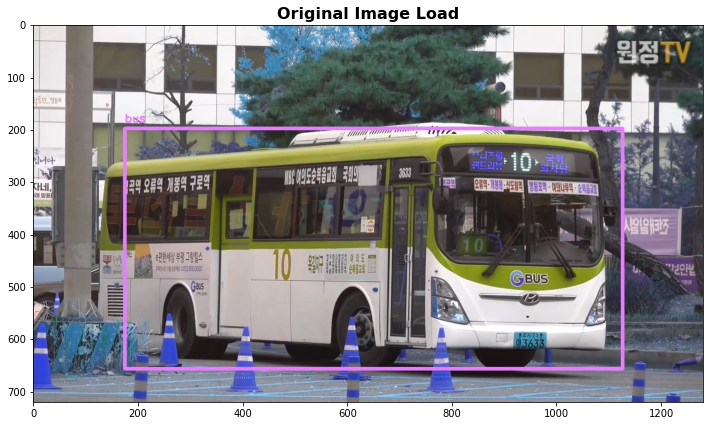

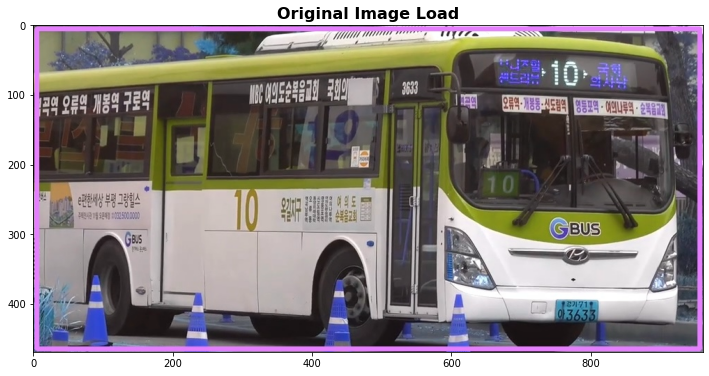

In [20]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract
import re
import math
import tensorflow as tf
import json

## Original Image Load
img = cv2.imread('./Image/bus_test_img.jpg')

plt.figure(figsize=(12, 10))
plt.title('Original Image Load', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.imshow(img,cmap='gray')

## 좌표값 저장
with open('./Image/bus_test_img.json', 'r') as f:
    json_data = json.load(f)
print(json.dumps(json_data, indent="\t") )
left = json_data[0]['topleft']
right = json_data[0]['bottomright']
xmin, ymin = left['x'], left['y']
xmax, ymax = right['x'], right['y']
print(xmin, ymin, xmax, ymax)

## Bounding Box Croping
# get the subimage that makes up the bounded region and take an additional 5 pixels on each side
box = img[int(ymin)-5:int(ymax)+5, int(xmin)-5:int(xmax)+5]

plt.figure(figsize=(12, 10))
plt.title('Original Image Load', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.imshow(box,cmap='gray')

[
	{
		"label": "bus",
		"confidence": 0.9,
		"topleft": {
			"x": 0,
			"y": 24
		},
		"bottomright": {
			"x": 634,
			"y": 344
		}
	},
	{
		"label": "truck",
		"confidence": 0.76,
		"topleft": {
			"x": 612,
			"y": 42
		},
		"bottomright": {
			"x": 849,
			"y": 290
		}
	}
]
0 24 634 344


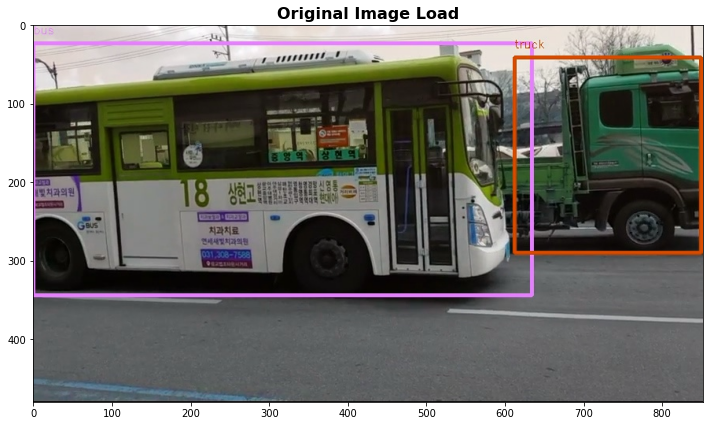

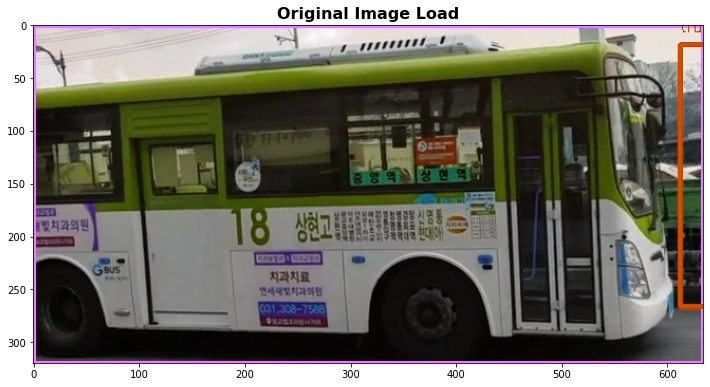

In [21]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract
import re
import math
import tensorflow as tf
import json

## Original Image Load
img = cv2.imread('./Image/bus_test_img2.jpg')

plt.figure(figsize=(12, 10))
plt.title('Original Image Load', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.imshow(img,cmap='gray')

## 좌표값 저장
with open('./Image/bus_test_img2.json', 'r') as f:
    json_data = json.load(f)
print(json.dumps(json_data, indent="\t") )
left = json_data[0]['topleft']
right = json_data[0]['bottomright']
xmin, ymin = left['x'], left['y']
xmax, ymax = right['x'], right['y']
print(xmin, ymin, xmax, ymax)

## Bounding Box Croping
# get the subimage that makes up the bounded region and take an additional 5 pixels on each side
box = img[int(ymin):int(ymax), int(xmin):int(xmax)]

plt.figure(figsize=(12, 10))
plt.title('Original Image Load', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.imshow(box,cmap='gray')